In [1]:
# загрузим библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from datetime import datetime
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузим и вызовем первые строки дата-сета
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [3]:
# посмотрим общую информацию о данных в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# посмотрим цифровое описание данных в таблице
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


### Вывод  описания данных

В таблице 11 стоблцов. 

Тип данных:
- float64 - 6 стоблцов,
- object - 5 столбцов.

В каждой строке таблицы — данные об играх: описательная часть с датами выпуска игр от 1980 по 2016г, а так же данные о продажах в разных странах и разные оценки игр. Предварительно можно утверждать, что, данных достаточно для проверки гипотез.

Но встречаются проблемы с данными:

- Есть пропущенные значения в столбцах
- Смешаный регистр в названии столбца
- Некорректные типы данных
- Значение 'tbd' в столбце с оценкой пользователей

## Подготовка данных

[Начало тетрадки](#intro)

### Замените названия столбцов (приведите к нижнему регистру)

# Заменим названия столбцов

In [5]:
# приведем название колонок к нижнему регистру
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


# Приведем данные к нужным типам

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Нужно привести:

- год к годам
- оценку пользователей к числам с плавающей запятой

### Обработайте пропуски при необходимости

In [7]:
# Посмотрим пропуски перед переводом в формат

data.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

In [8]:
# Посмотрим теперь в процентах
data.isna().sum().sort_values()/data.shape[0]*100

platform           0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
name               0.01
genre              0.01
year_of_release    1.61
user_score        40.09
rating            40.48
critic_score      51.32
dtype: float64

Имеем:
- 2 игры без названия
- 2 игры без жанра
- в 1,61% отсутствует год выпуска
- в 40.09% отсутствует оценка пользователей
- в 40.48 отсутствует рейтинг от организации ESRB
- в 51.32% отсутствует оценка критиков

Необходимость заполнять пропуски:
* Пропуски в scores заполнять *не надо* - любое заполнение исказит результаты корреляционного анализа и стат-тестов. 
* Пропуски в rating *можно заполнить заглушкой* потому, что это категориальная переменная. 
* Пропуски в годах и названиях игр заполнять *не нужно* - их не более 2%, можно просто отфильтровать эти строки из набора данных.

In [9]:
# найдем строки с пропусками в имени
data['name'].isna().sort_values()

0        False
11134    False
11135    False
11136    False
11137    False
         ...  
5568     False
5573     False
16714    False
659       True
14244     True
Name: name, Length: 16715, dtype: bool

In [10]:
# Посмотрим строку 659
data.loc[659]

name                   NaN
platform               GEN
year_of_release   1,993.00
genre                  NaN
na_sales              1.78
eu_sales              0.53
jp_sales              0.00
other_sales           0.08
critic_score           NaN
user_score             NaN
rating                 NaN
Name: 659, dtype: object

In [11]:
# Посмотрим строку 14244
data.loc[14244]

name                   NaN
platform               GEN
year_of_release   1,993.00
genre                  NaN
na_sales              0.00
eu_sales              0.00
jp_sales              0.03
other_sales           0.00
critic_score           NaN
user_score             NaN
rating                 NaN
Name: 14244, dtype: object

In [12]:
# Изучим строки с пропусками
data[data.isna().any(1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN
10,Nintendogs,DS,"2,005.00",Simulation,9.05,10.95,1.93,2.74,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


Возможные причины появления пропусков:
- Пропуски в названии игры - похоже на техническую ошибку: одна платформа, один год издания, довольно старый - 1993. Одна игра продавалась только в Японии, вторая где угодно, кроме Японии. Мое предположение - это задублировавшаяся при переносе данных игра, у которой снесло название. Вторая гипотеза: данные добыты из открытых исторических источников, а не напрямую из логов компаний, данные могут быть не полными за давностью лет.
- Пропуски в жанре - та же самые строки, что и пропуски в имени.
- Пропуски в годе издания - похоже на техническую ошибку. На разных платформах игры выходят в разное время, эти данные могли быть повреждены при копировании.
- Пропуски в оценках игроков, пропуски в оценках критиков, пропуски в рейтинге - имеются в большом количестве, от 40 до 51%, часто встречаются вместе часть выражена NaN, часть TBD. Очень похоже на то что хранились в других таблицах и не были переданы для анализа.

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. По сути NaN, вести себя с ним будем как с пропусками.

In [13]:
data['rating'] = data['rating'].fillna('unknown')

In [14]:
# удалим строки с пропущенным годом, названием и жанром
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])

In [15]:
# Посмотрим оставшиеся пропуски
data.isna().sum().sort_values()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
user_score         6605
critic_score       8461
dtype: int64

Строки с пропусками в имени, жанре и дате релиза удалены.

### Преобразуйте данные в нужные типы

Нельзя поменять тип данных у части значений в колонке (вернее можно, но колонка все равно останется float). В конкретно этом случае лучше просто исключить игры без годов выпуска. Их 1,61% (меньше 5%) - это очень мало. Проставлять значения не будем, так как выход одной игры на разных платформах может отличаться в 3-5 лет.

In [16]:
data['year_of_release'] = data['year_of_release'].astype('int')

data['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

После замены типа данных на целочисленный получили годы с 1980 по 2016.

In [17]:
# tbd мешает приведению к точке с плавающей запятой, посмотрим подробнее
data[data['user_score'] == 'tbd']['user_score'].count()

2376

In [18]:
# Так как это пропуски, то проставим np.nan
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data[data['user_score'] == 'tbd']['user_score'].count()

0

Все tbd заменены на nan

In [19]:
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Оценки пользователей приведены к фармату числа с плавающей точкой

In [20]:
# До кучи проставим строчные буквы в именных столбцах
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()

In [21]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,nan,nan,unknown
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,nan,nan,unknown


Теперь все буквы в таблице строчные.

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [22]:
# Посчитайте количество продаж во всех регионах и запишите в отдельный столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,nan,nan,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,nan,nan,unknown,31.38


Столбец с суммарными продажами рассчитан и записан.

### Выводы по подготовке данных

- все строковые значения изменены на "нижний" регистр
- заменены форматы данных в колонках "год издания игры" и "оценка пользователей"
- определены и описаны вероятные причины появления пропусков
- удалены строки с пропущенным годом, названием и жанром
- остальные пропуски оставлены, чтобы не искажать картину анализа данных
- создан столбец с суммарными продажами

## Исследовательский анализ данных


[Начало тетрадки](#intro)

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

3. Возьмите данные за соответствующий **актуальный период**. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за **предыдущие годы**.

4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

5. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

6. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [23]:
# посчитаем скольео игр выпускалось
data.groupby('year_of_release')['year_of_release'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

Text(0.5, 1.0, 'Количество игр выпускаемое в разные годы')

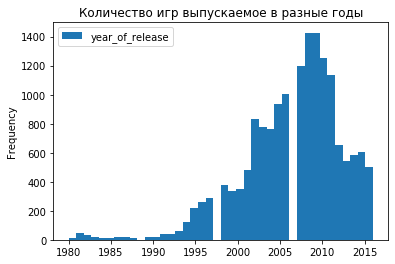

In [24]:
# построим для наглядности гистограмму 

ax = data['year_of_release'].plot(kind='hist', bins=40).legend()
plt.title('Количество игр выпускаемое в разные годы')

Появились в 80-ых, затем было долго плато — мощностей не хватало, а на текстовых квестах много не заработаешь. С 95-года росли чипы видеоадаптеров в мощности, соответственно игр выпускалось все больше. С 2010 года спад, насыщение рынка, переход на мобильные платформы. Можно сказать, что данные до 1995 года не важны. Отбросим их.

In [25]:
# оставим в таблице игры моложе 1995 года
data = data.query('year_of_release >= 1995')

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [26]:
# соберем топ-10 платформ с наибольшими суммарными продажами и посмотрим сколько их
top_10 = data.groupby('platform')\
    .agg({'total_sales': 'sum'})
top_10 = top_10.sort_values('total_sales', ascending=False).head(10)
top_10.sort_values('total_sales', ascending=False).head(10)

,total_sales
platform,
ps2,"1,233.56"
x360,961.24
ps3,931.34
wii,891.18
ds,802.76
ps,721.55
ps4,314.14
gba,312.88
psp,289.53


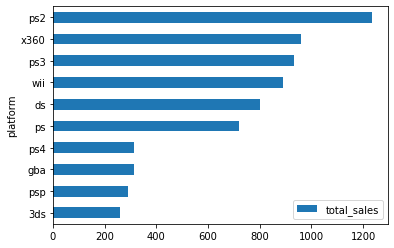

In [27]:
# построим гистограмму топов платформ по суммарным продажам

top_10.sort_values('total_sales', ascending=True).plot(kind='barh')

Из графика наглядно видно суммарные продажи по лидирующим платформам.

In [28]:
# заберем названия, лежащие в индексе
top_10 = top_10.index

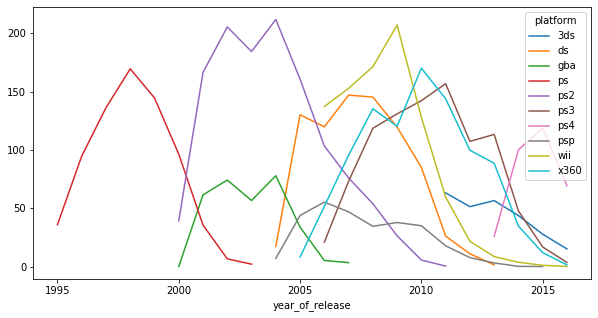

In [29]:
# посмотрим распределение по годам

data.query('platform in @top_10').pivot_table(index = 'year_of_release',
                                                            columns = 'platform',
                                                            values = 'total_sales',
                                                            aggfunc = 'sum').plot(figsize=(10,5))
plt.xlim(1994, 2017)
plt.show()

Из графика распределения по годам видим время "жизни" 10 самых продаваемых платформ. В среднем платформа довольно резко стартует, потом наступает плато, часто с небольшим "проседанием" по продажам, после продажи так же резко падают. После еще год - два идут минималье продажи и платформа "умирает".

In [30]:
# минимальные значимые продажи в миллионах
min_sales = 10

In [31]:
# суммарные продажи в год выше порога
report = data.query('platform in @top_10').groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).query('total_sales > @min_sales') # среднее число лет выше порога продаж, деленное на 2 (половину времени существования платформа падает)
report.reset_index().groupby('platform').agg({'year_of_release': 'nunique'}).mean() / 2


year_of_release   3.75
dtype: float64

Старые платформы изчезают и появляются новые, в среднем, за 3,7 года. 

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. 

Ранее мы определили период появления и исчезания платформ в 3,7 года. Будем считать его актуальным для прогноза на 2017. Данные заканчиваются 2016 годом, следовательно берем данные от 2012 по 2016.

In [32]:
# отбросим неактуальные данные
data = data.query('year_of_release >= 2012')

In [33]:
# посмотрим что осталось
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null int64
genre              2886 non-null object
na_sales           2886 non-null float64
eu_sales           2886 non-null float64
jp_sales           2886 non-null float64
other_sales        2886 non-null float64
critic_score       1312 non-null float64
user_score         1531 non-null float64
rating             2886 non-null object
total_sales        2886 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


В таблице осталось 1689 игр из 16713, но и максимальное количество игр было выпущено в период с 2006 по 2011. Фильтр сработал.

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

data.describe()

In [34]:
# посмотрим какие платформы остались
data['platform'].unique()

array(['ps3', 'x360', 'ps4', '3ds', 'ds', 'xone', 'wiiu', 'wii', 'pc',
       'psv', 'psp'], dtype=object)

Осталось 11 живых платформ.

(2011, 2016)

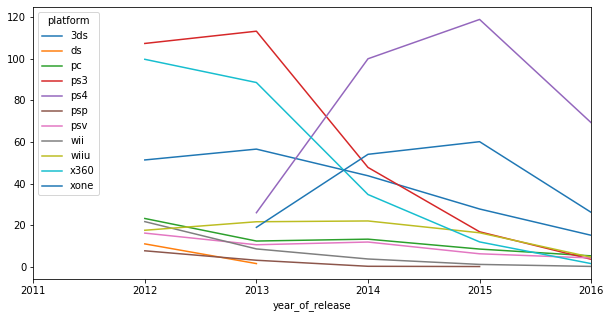

In [35]:
# посмотрим распределение по годам

data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(figsize=(10,5))
plt.xlim(2011, 2016)

Из графика видим, что в определенном актуальном периоде все платформы "падают":
- ds - закончила свое существование в 2013,
- psp - закончила свое существование в 2015,

Платформы, которые в самом конце своего существования:
- pc
- wii
- wiiu
- psv

Платформы, которые относительно недавно сошли с пика продаж:
- ps3 - выглядит как пик, но это второе рождение на фоне выпуска ps4
- x360

Платформы, которые были на пике продаж в указанный период: 
- ps4
- xone
- 3ds

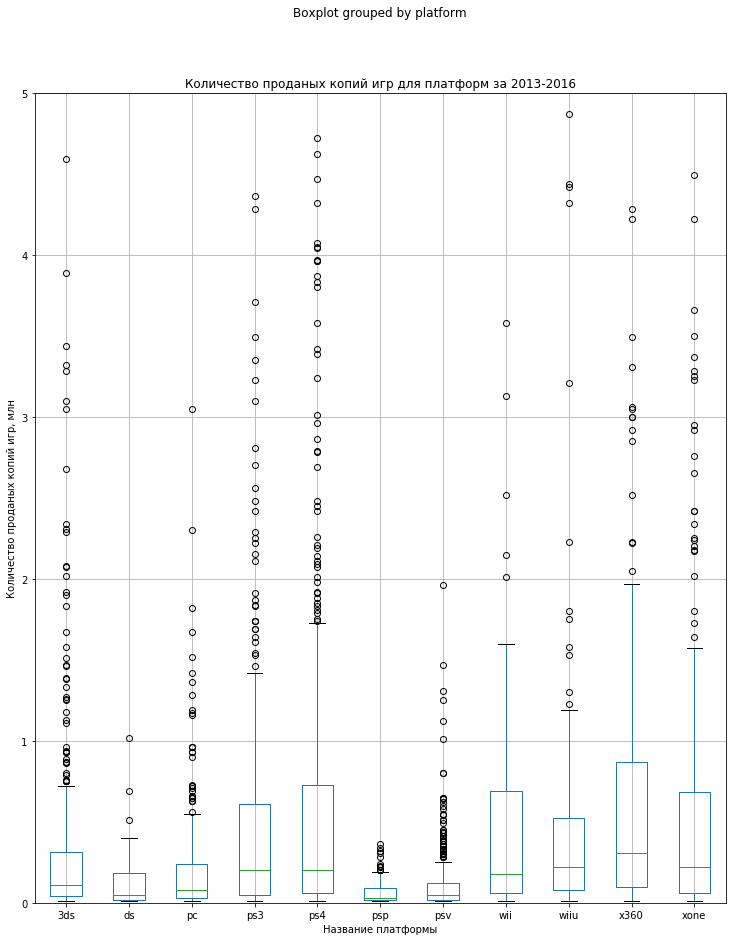

In [36]:
# построим диаграмму размаха

data.boxplot('total_sales', by='platform',figsize=(12,15)).set_ylim(0,5)
plt.xlabel('Название платформы')
plt.ylabel('Количество проданых копий игр, млн')
plt.title('Количество проданых копий игр для платформ за 2013-2016')
plt.show()

Ящик с усами говорит о том, что:
- игры для psp, psv не достигают полумиллиона проданых копий и имеют самые низкие продажи
- ds прочно лежит, продажи остановились на половине миллиона копий, выбросные значения отсутствую.
- картина для pc примерно такая же как для ds, но имеется хвост из выбросов, платформа еще жива
- 3ds незначительно выше четверых предыдущих по межквартильному размаху, однако имеется большой хвост из выбросов. Пик продаж у данной платформы был в 2013, но это ей не помогло
- приблизительно одно положение у ps3 и wiiu, wiiu сошла с пика продаж давно, ps3 переживала второй пик продаж в 2013. Предположительно, этим можно объяснить разницу в выбросных хвостах, у wiiu он значительно меньше ps3
- следующаяя пара wii и xone, по медианному значению они очень близки к предыдущей паре, но приблизительно на треть выше по межквартильному размаху.
- ps4 и x360 пара лидеров продаж, для ps4 это характерно - она была на пике продаж в выбранном периоде, а x360 дожимает плоды былой славы

Потенциально прибыльными можно считать ps4, xone, 3ds

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. 

In [37]:
# посчитаем, есть ли взаимосвязь между отзывали пользователей и продажами
data.query('platform == "ps4"')['user_score'].corr(data.query('platform == "ps4"')['total_sales'])

-0.031957110204556424

Линейная корреляция на уровне -3%. Линейной зависимости нет.

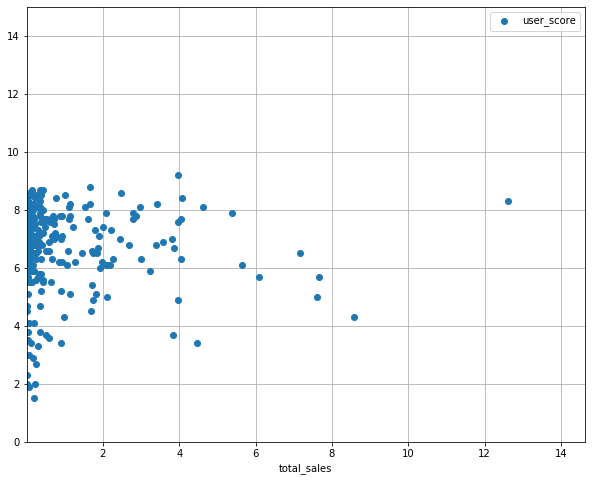

In [38]:
# поищем взаимосвязь на диаграмме рассеяния

data.query('platform == "ps4"').plot( x='total_sales',
           y='user_score',
           ylim=(0, 15),
           style='o',
           grid=True,
           figsize=(10, 8))

In [39]:
# посчитаем, есть ли взаимосвязь между отзывали критиков и продажами
data.query('platform == "ps4"')['critic_score'].corr(data.query('platform == "ps4"')['total_sales'])

0.40656790206178095

Величина коэффициента корреляции отражает силы связи. При оценке силы связи коэффициентов корреляции используется шкала Чеддока. Наш коэфициент 0,4 - слабая линейная зависимость.

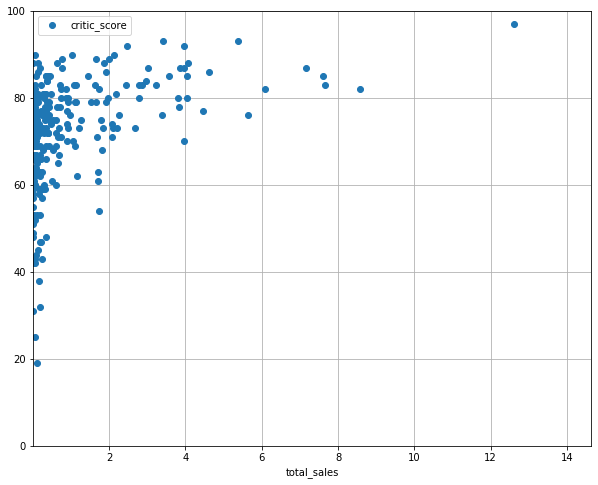

In [40]:
# посмотрим взаимосвязь на диаграмме рассеяния

data.query('platform == "ps4"').plot( x='total_sales',
           y='critic_score',
           ylim=(0, 100),
           style='o',
           grid=True,
           figsize=(10, 8))

На графике видим слабую линейную зависимость, высокие оценки критиков несколько влияют на количество продаж. Несмотря на то, что не нашли линейную зависимость между пользовательскими оценками и продажами, графики продаж выглядят похоже.

In [41]:
# проверим есть ли линейная взаимосвязь между оченками пользователей и критиков
data.query('platform == "ps4"')['user_score'].corr(data.query('platform == "ps4"')['critic_score'])

0.5576539782764632

0,55 по шкале Чеддока считается средней зависимостью - стоит это учитывать. 

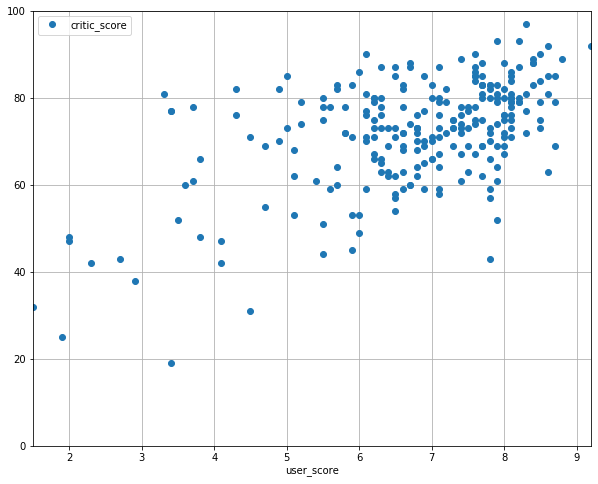

In [42]:
# поищем взаимосвязь на диаграмме рассеяния

data.query('platform == "ps4"').plot( x='user_score',
           y='critic_score',
           ylim=(0, 100),
           style='o',
           grid=True,
           figsize=(10, 8))

Оценки пользователей не влияют на продажи, а оценки критиков влияют. Можно предположить, что критикам  выгодно ставить высокие оценки, если пользователи высоко оценивают игру.

### Соотнесите выводы с продажами игр на других платформах.

In [43]:
# посчитаем, есть ли взаимосвязь между отзывали пользователей и продажами

print("{0:.2f} Коэффициент корреляции между отзывали пользователей и продажами xone".format(data.query('platform == "xone"')['user_score'].corr(data.query('platform == "xone"')['total_sales'])))
print("{0:.2f} Коэффициент корреляции между отзывали пользователей и продажами 3ds".format(data.query('platform == "3ds"')['user_score'].corr(data.query('platform == "3ds"')['total_sales'])))

-0.07 Коэффициент корреляции между отзывали пользователей и продажами xone
0.20 Коэффициент корреляции между отзывали пользователей и продажами 3ds


У xone так же картина, что и у ps4. Линейной зависимости нет. Можно было бы сказать, что первый положительный коэффициент у 3ds говорит о положительной зависимости, однако, шкала Чеддока четко дает ответ: от 0 до 0,3 это очень слабая корреляция, и скорее всего мы не будем принимать ее в расчет.

In [44]:
# посчитаем, есть ли взаимосвязь между отзывали пользователей и продажами
print("{0:.2f} Коэффициент корреляции между отзывали критиков и продажами xone".format(data.query('platform == "xone"')['critic_score'].corr(data.query('platform == "xone"')['total_sales'])))
print("{0:.2f} Коэффициент корреляции между отзывали критиков и продажами 3ds".format(data.query('platform == "3ds"')['critic_score'].corr(data.query('platform == "3ds"')['total_sales'])))

0.42 Коэффициент корреляции между отзывали критиков и продажами xone
0.32 Коэффициент корреляции между отзывали критиков и продажами 3ds


У xone коэффициент корреляции Пирсона между критиками и продажами - 0.41, у 3ds - 0.32. Две слабые линейные зависимости. Как и у ps4.

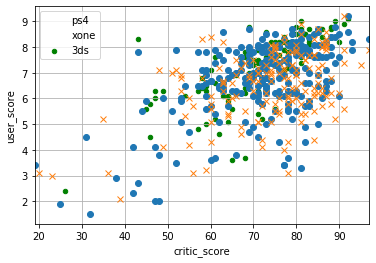

In [45]:
# построим диаграмму рассеяния
ax = data.query('platform == "ps4"').plot(x='critic_score', y = 'user_score', style = 'o', label = 'ps4')
data.query('platform == "xone"').plot(x='critic_score', y = 'user_score', style = 'x', ax=ax, label = 'xone')
data.query('platform == "3ds"').plot(kind = 'scatter', x='critic_score', y = 'user_score', color = 'green', grid=True, ax=ax, label = '3ds')

На всех самых перспективных в выбранном периоде платформах. Имеется зависимость между оценками пользователей и критиков.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [46]:
# посмотрим какие жарны игры были выпущены в актуальном периоде
data['genre'].sort_values().unique()

array(['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle',
       'racing', 'role-playing', 'shooter', 'simulation', 'sports',
       'strategy'], dtype=object)

In [47]:
# посчитаем сколько игр разных жанров выпустили
popular_genre = data.groupby('genre').agg({'name':'count'})
popular_genre.sort_values(by='name', ascending=False)

,name
genre,
action,1031
role-playing,370
adventure,302
sports,268
shooter,235
misc,192
racing,115
fighting,109
platform,85


С отрывом лидирует action.

Text(0.5, 0, 'Количество продаж, мнл копий')

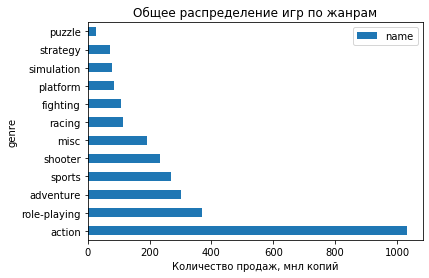

In [48]:
# построим для наглядности гистограмму 
ax = popular_genre.sort_values(by='name', ascending=False).plot(kind='barh')
plt.title('Общее распределение игр по жанрам')
plt.xlabel('Количество продаж, мнл копий')

Самыми непопулярными оказались пазлы, самыми выпускаемыми - экшены. Так же в пятерке лидеров оказались по убыванию: ролевые игры, приключения, спорт и шутеры.

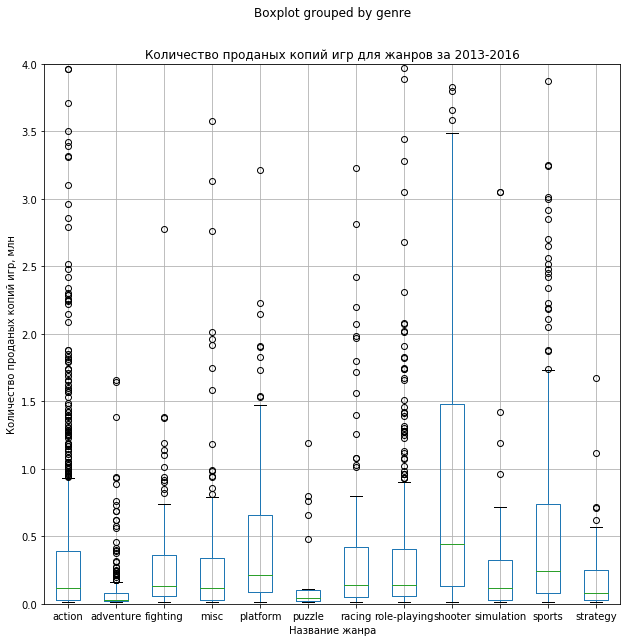

In [49]:
# Посмотрим на жанры с точти зрения прибыли
data.boxplot(column = 'total_sales', by = 'genre', figsize=(10,10))
plt.ylim([0, 4])
plt.xlabel('Название жанра')
plt.ylabel('Количество проданых копий игр, млн')
plt.title('Количество проданых копий игр для жанров за 2013-2016')
plt.show()

Из диаграммы размаха видим, что самые выпускамые и самые продаваемые игры - это две большие разницы. Лучше всего продаются шутеры, а у самых выпускаемых экшенов продажи часто улетают в выбросы.

In [50]:
# посчитаем медианные продажи по жанрам для оценки их прибыльности.
data.groupby('genre').agg({'total_sales':'median'})

,total_sales
genre,
action,0.12
adventure,0.03
fighting,0.13
misc,0.12
platform,0.21
puzzle,0.04
racing,0.14
role-playing,0.14
shooter,0.44


На диаграмме размаха продаж увидели значительное количество выбросов, поэтому будем оценивать медианные продажи, как более устойчивые к выбросам:

- Максимальные медианные продажи у шутеров 0,44 млн копий
- Второе место занимает спорт 0,24 млн копий
- На третьем платформеры 0,21 млн копий
- Четвертое делят гонки и ролевые игры с продажами в 0,14 млн копий
- Пятое место по продажам занимают драки 0,13 млн
- Шестую позицию делят игры "разных" жанров, симуляции и экшены - 0,12 млн копий
- Седьмое место у стратегий 0.08 млн копий
- Восьмое пазлы 0.04
- На девятом приключения 0.03

Не важно сколько игры разных жанров вы придумали, медианные продажи говорят сами за себя. Пазлов очень мало, но продаются они лучше, чем приключения. Экшенов написали 1031, однако, спорт, которых 268 в указанном периоде, превосходят экшен по медианным продажам на 0,32 млн копий.

### Вывод по исследовательскому анализу данных

Появились в 80-ых, затем было долго плато — мощностей не хватало, а на текстовых квестах много не заработаешь. С 95-года росли чипы видеоадаптеров в мощности, соответственно игр выпускалось все больше. С 2010 года спад, насыщение рынка, переход на мобильные платформы. Можно сказать, что данные до 1995 года не важны.

Рассмотрели время "жизни" 10 самых продаваемых платформ. В среднем платформа довольно резко стартует, потом наступает плато, часто с небольшим "проседанием" по продажам, после продажи так же резко падают. После еще год - два идут минималье продажи и платформа "умирает".

Определили период появления и исчезания платформ в 3,7 года. Будем считать его актуальным для прогноза на 2017. Данные заканчиваются 2016 годом, следовательно берем данные от 2012 по 2016.

В определенном актуальном периоде все платформы "падают". На пике продаж в указанный период:

* ps4
* xone
* 3ds

Оценки пользователей не влияют на продажи, а оценки критиков влияют. Можно предположить, что критикам выгодно ставить высокие оценки, если пользователи высоко оценивают игру. На всех самых перспективных в выбранном периоде платформах. Лучше всего продаются шутеры. Экшенов много, но спорт берут чаще. Пазлов очень мало, но продаются они лучше, чем приключения. 


## Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [51]:
# посчитаем количество и долю продаж по популярным платформам в северной америке
platform_top_na = data.groupby ('platform').agg ({'na_sales': 'sum'}).sort_values (by ='na_sales', ascending = False).reset_index()
platform_top_na['%_of_total'] = platform_top_na['na_sales'] / platform_top_na['na_sales'].sum()
platform_top_na = platform_top_na.head()
platform_top_na

,platform,na_sales,%_of_total
0,x360,140.05,0.24
1,ps4,108.74,0.18
2,ps3,103.38,0.17
3,xone,93.12,0.16
4,3ds,55.31,0.09


Из таблицы видим, что лидирующей приставкой является x360. Его выбирает 24% игроков Северной Америки. Количество проданых копий игр для x360 составило 140.05 млн. На втором месте ps4 - выбор 18% игроков и 108.74 млн проданых копий. Второе, третье и четвертое место отличаются друг от друга на 1% от общего числа игроков: 18, 17 и 16%. На пятом месте топ-5 - 3ds, 55.31млн проданых копий. Еще 16% игроков выбирают не такие популярные приставки.

In [52]:
# посчитаем количество и долю продаж по популярным платформам в японии
platform_top_jp = data.groupby ('platform').agg ({'jp_sales': 'sum'}).sort_values (by ='jp_sales', ascending = False).reset_index()
platform_top_jp['%_of_total'] = platform_top_jp['jp_sales'] / platform_top_jp['jp_sales'].sum()
platform_top_jp = platform_top_jp.head()
platform_top_jp

,platform,jp_sales,%_of_total
0,3ds,87.79,0.46
1,ps3,35.29,0.18
2,psv,21.04,0.11
3,ps4,15.96,0.08
4,wiiu,13.01,0.07


Из таблицы видим, что лидирующей приставкой является 3ds. Его выбирает 46% игроков Японии. Количество проданых копий игр для 3ds составило 87.79 млн. Со значительным отрывом на втором месте ps3. 35.29 млн проданых копий и 18% игроков. В psv играет 11% игроков и купили 21.04 млн копий игр. На четвертом месте ps4 - выбор 8% игроков. На пятом wiiu 7% игроков. Топ-5 приствок в Японии очень популярен, другие приставки выбирает всего 10% игроков.

In [53]:
# посчитаем количество и долю продаж по популярным платформам в европе
platform_top_eu = data.groupby ('platform').agg ({'eu_sales': 'sum'}).sort_values (by ='eu_sales', ascending = False).reset_index()
platform_top_eu['%_of_total'] = platform_top_eu['eu_sales'] / platform_top_eu['eu_sales'].sum()
platform_top_eu = platform_top_eu.head()
platform_top_eu

,platform,eu_sales,%_of_total
0,ps4,141.09,0.28
1,ps3,106.86,0.21
2,x360,74.52,0.15
3,xone,51.59,0.10
4,3ds,42.64,0.08


Из таблицы видим, что лидирующей приставкой является ps4. Его выбирает 28% игроков Европы. Количество проданых копий игр для ps4 составило 141.09 млн. С отрывом в 7% игроков и 34,23млн проданых копий игр на втором месте ps3. Третье место занимает x360 - выбор 15% игроков и 74.52 млн проданых копий игр. Четвертое место у xone, 10% игроков и 51.59 млн проданых копий игр. На пятом 3ds. Его выбирают 8% игроков. 18% игроков выбирает другие приставки.

Text(0, 0.5, 'количество продаж игр в млн копий')

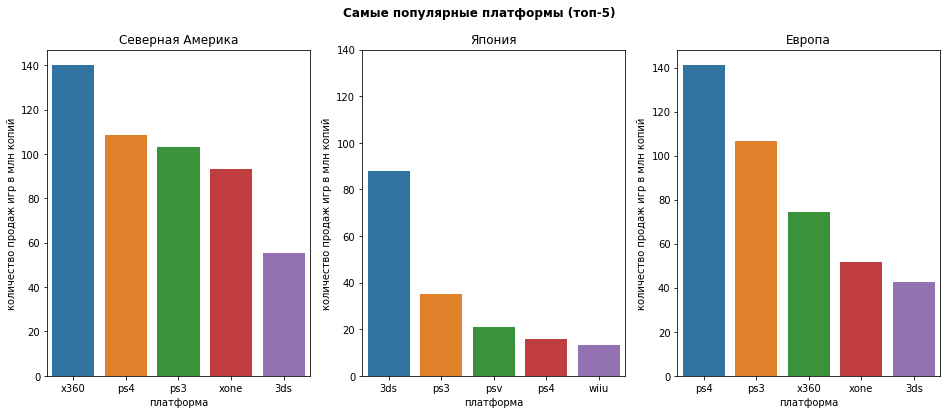

In [54]:
#графики в одну строку
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

fig.suptitle('Самые популярные платформы (топ-5)', fontweight ="bold")

#график по Северной Америке
ax1 = sns.barplot(data=platform_top_na, x='platform', y='na_sales', ax=ax1)
ax1.set_title('Северная Америка')
ax1.set_xlabel('платформа')
ax1.set_ylabel('количество продаж игр в млн копий')

# график по Японии
ax2 = sns.barplot(data=platform_top_jp, x='platform', y='jp_sales', ax=ax2)
ax2.set_ylim(0,140)
ax2.set_title('Япония')
ax2.set_xlabel('платформа')
ax2.set_ylabel('количество продаж игр в млн копий')

# график по Европе
ax3 = sns.barplot(data=platform_top_eu, x='platform', y='eu_sales', ax=ax3)
ax3.set_title('Европа')
ax3.set_xlabel('платформа')
ax3.set_ylabel('количество продаж игр в млн копий')

Из графика видим:

- В Японии численность населения меньше, чем в США или Европе, соответственно меньше игроков и ниже продажи.

- У Японии в топ-5 только приставки собственных производителей, приставки от Microsoft в топ-5 не вошли

- На родине Майкрософта доминирует он же. Европа любит приставку Японии. Япония предпочитает портативную игру. В каждой стране лидирующия приставка имеет отрыв на не менее, чем 30млн копий игр от второй позиции. В Японии лидирующая приставка занимает чуть меньше, чем половину игроков. В Европе и Америке лидирующая приставка увлекает около четверти игроков.

- ps3 занимает второе место в Европе и Японии

- ps4 в Америке и Европе более популярен, чем ps3. В Японии наоборот.

- xone и 3ds занимают четветрую и пятую позиции, как в Америке, так и в Европе. 

- psv и wiiu входят в топ-5 только в Японии и не популярен в других локациях.

### Самые популярные жанры (топ-5). Поясните разницу.

              na_sales
genre                 
action          177.84
shooter         144.77
sports           81.53
role-playing     64.00
misc             38.19


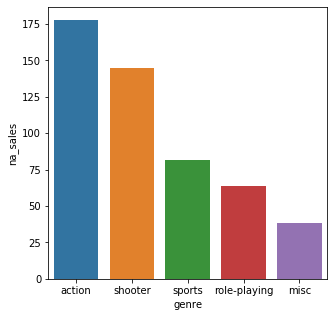

              eu_sales
genre                 
action          159.34
shooter         113.47
sports           69.09
role-playing     48.53
racing           27.29


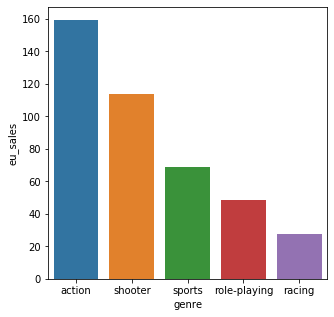

              jp_sales
genre                 
role-playing     65.44
action           52.80
misc             12.86
simulation       10.41
fighting          9.44


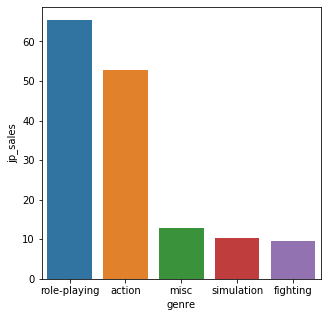

In [55]:
# посчитаем продажи по жанрам для топ-5 по локациям
def sales(info): # функция, которая все нарисует
    countries = data[['na_sales', 'eu_sales', 'jp_sales']] # все нужные страны
    for col in countries: # все колонки с продажами в нужных странах
        pivot_table = data.pivot_table(index=info, values=col, aggfunc = 'sum').sort_values(col, ascending=False)
        top_5 = pivot_table.head()
        print(top_5)
        
        plt.figure(figsize=(5,5))
        sns.barplot(data=top_5, x=top_5.index, y=col)
        plt.show()
    
for info in ['genre']:
    sales(info)

В Северной Америке и Европе цифры приблизительно одинаковые:

* Первые четыре пункта одинаковые по убыванию выбирают экшены, шутеры, спорт и ролевые игры. 
* На пятом месте в Америке все подряд, в Европе гонки. 
* Распредения выглядят примерно одинаково.

В Японии:
* На первом месте ролевые игры
* Экшены на втором месте
* Между третьим и вторым местом разница в продажах в 4 раза, что составило 39,9млн копий. На третьем месте все подряд.
* Разница в продажах между третьим, четвертым и пятым местом в среднем 1,7млн копий

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

         na_sales
rating           
m          231.57
e          114.37
unknown    103.31
e10+        75.70
t           66.02


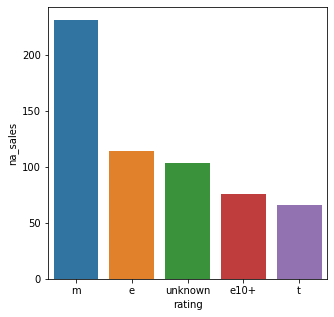

         eu_sales
rating           
m          193.96
e          113.03
unknown     91.50
e10+        55.37
t           52.96


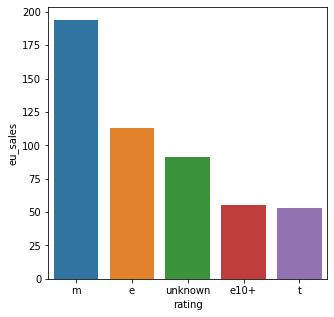

         jp_sales
rating           
unknown    108.84
e           28.33
t           26.02
m           21.20
e10+         8.19


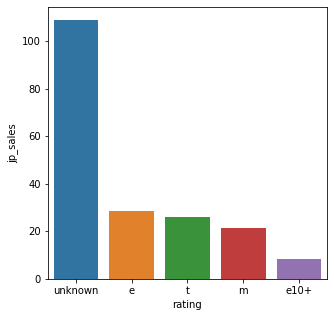

In [56]:
# посчитаем продажи по рейтингам для топ-5 по локациям
def sales(info): # функция, которая все нарисует
    countries = data[['na_sales', 'eu_sales', 'jp_sales']] # все нужные страны
    for col in countries: # все колонки с продажами в нужных странах
        pivot_table = data.pivot_table(index=info, values=col, aggfunc = 'sum').sort_values(col, ascending=False)
        top_5 = pivot_table.head()
        print(top_5)
        
        plt.figure(figsize=(5,5))
        sns.barplot(data=top_5, x=top_5.index, y=col)
        plt.show()
    
for info in ['rating']:
    sales(info)

Для Америки и Европы система рейтингов актуальна и влияет на продажи. Мы видим рейтинговые значения m и e на первых двух позициях, неопределенный рейтинг на третьем месте и рейтинговые значения e10+ и t на четвертом и пятом местах. Распределения приблизительно одинаковые. Продажи на втором месте составляет примерно половину от продаж на первом.

Для Японии система рейтингов выглядит неактуальной и не влияющей на продажи. На первом месте неопределенный рейтинг. Системные рейтинги расположились от второго по четвертое места. Продажи на втором месте составляют приблизительно четверть от продаж на первом.

### Вывод по портрету пользователя:

* Определены самые популярные платформы для каждой локации
* Определены самые популярные жанры для каждой локации
* Определено влияние рейтинга ESRB на продажи в отдельном регионе

## Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:

* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [57]:
# зададим альфу
alpha = 0.05

In [58]:
# сформируем выборки 
xone = data[(data['platform'] == 'xone') & (data['user_score'] > 0)]['user_score'] # для игроков Xbox One
pc = data[(data['platform'] == 'pc') & (data['user_score'] > 0)]['user_score'] # для игроков на компьютере

In [59]:
# посмотрим числовые значения выборки Xbox One 
xone.describe()

count   182.00
mean      6.52
std       1.38
min       1.60
25%       5.80
50%       6.80
75%       7.50
max       9.20
Name: user_score, dtype: float64

Посмотрели на выборку рейтинга игроков для Xbox One. Всего 182 оценки. Средний балл 6.52. Медианное значение 6.8 балла. Минимальная оценка - 1.6 балла, максимальная - 9.2.

In [60]:
# посмотрим числовые значения выборки PC
pc.describe()

count   206.00
mean      6.43
std       1.66
min       1.40
25%       5.50
50%       6.80
75%       7.70
max       9.30
Name: user_score, dtype: float64

Посмотрели на выборку рейтинга игроков для PC. Всего 206 оценок. Средний балл 6.43. Медианное значение 6.8 балла. Минимальная оценка 1.4, максимальная - 9.3.

Выборки очень похожи, однако, есть сомнения, что дисперсии у совокупностей одинаковые, параметр equal_var при вызове метода scipy.stats.ttest_ind() укажем, как False, и тест посчитает дисперсии выборок по отдельности.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотеза о равенстве средних двух генеральных совокупностей №1

Гипотезы:
* H0: средний пользовательский рейтинги платформ Xbox One и PC одинаковые
* H1: средний пользовательский рейтинги платформ Xbox One и PC различаются

In [61]:
results = st.ttest_ind(xone, pc, equal_var = False)

In [62]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 54% такой результат может быть получен случайно. Значимых различий нет.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные

In [63]:
# сформируем выборки 
action = data[(data['genre'] == 'action') & (data['user_score'] > 0)]['user_score'] # для игроков в экшен
sports = data[(data['genre'] == 'sports') & (data['user_score'] > 0)]['user_score'] # для игроков в спорт

In [64]:
# посмотрим числовые значения выборки PC
action.describe()

count   523.00
mean      6.83
std       1.37
min       1.60
25%       6.25
50%       7.10
75%       7.80
max       9.10
Name: user_score, dtype: float64

Смотрим числовые значения выборки action. Всего 523 оценки. Средний балл 6.83. Медианный 6.25. Минимальный балл 1.6, максимальный - 9.1.

In [65]:
# посмотрим числовые значения выборки PC
sports.describe()

count   195.00
mean      5.46
std       1.74
min       0.20
25%       4.30
50%       5.70
75%       6.80
max       8.80
Name: user_score, dtype: float64

Смотрим числовые значения выборки sports. Всего 195 оценок. Средний балл 5.46. Медианный 5.7. Минимальный балл 0.2, максимальный - 8.8.

Выборки сильно различаются, есть сомнения, что дисперсии у совокупностей одинаковые, параметр equal_var при вызове метода scipy.stats.ttest_ind() укажем, как False, и тест посчитает дисперсии выборок по отдельности.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотеза о равенстве средних двух генеральных совокупностей №1

Гипотезы:

H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
H1: средний пользовательский рейтинг жанров Action и Sports различается

In [66]:
results = st.ttest_ind(action, sports, equal_var = False)

In [67]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Разница не случайна, есть значимые различия между выборками

### Результат исследования

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые и это не связано с популярностью платформы. Несмотря на то, что Xbox One находится в пятерке лидеров платфом в Европе и Америке, а PC не попал в топ-продаж нигде.

Средние пользовательские рейтинги жанров Action  и Sports разные и это связано с популярностью жанра, но не с продажами. В Action играет много народу по всему миру, он входит в топ-5 по всем регионам. Спортивные игры выбирают Европа и Америка, а Япония их избегает. Медианные продажи у жанра спорт выше, но у экшенов сильнео больше игр.

## Общий вывод

**В таблице 11 стоблцов.**

Тип данных:

* `float64` - 6 стоблцов,
* `object` - 5 столбцов.

В каждой строке таблицы — данные об играх: описательная часть с датами выпуска игр от 1980 по 2016г, а так же данные о продажах в разных странах и разные оценки игр. Предварительно можно утверждать, что, данных достаточно для проверки гипотез.

Но встречаются проблемы с данными:

* Есть пропущенные значения в столбцах
* Смешаный регистр в названии столбца
* Некорректные типы данных
* Значение 'tbd' в столбце с оценкой пользователей

**За подготовку данных:**

* все строковые значения изменены на "нижний" регистр
* заменены форматы данных в колонках "год издания игры" и "оценка пользователей"
* определены и описаны вероятные причины появления пропусков
* удалены строки с пропущенным годом, названием и жанром
* остальные пропуски оставлены, чтобы не искажать картину анализа данных
* создан столбец с суммарными продажами

Появились в 80-ых, затем было долго плато — мощностей не хватало, а на текстовых квестах много не заработаешь. С 95-года росли чипы видеоадаптеров в мощности, соответственно игр выпускалось все больше. С 2010 года спад, насыщение рынка, переход на мобильные платформы. Можно сказать, что данные до 1995 года не важны.

Рассмотрели время "жизни" 10 самых продаваемых платформ. В среднем платформа довольно резко стартует, потом наступает плато, часто с небольшим "проседанием" по продажам, после продажи так же резко падают. После еще год - два идут минималье продажи и платформа "умирает".

Определили период появления и исчезания платформ в 3,7 года. Будем считать его актуальным для прогноза на 2017. Данные заканчиваются 2016 годом, следовательно берем данные от 2012 по 2016.

В определенном актуальном периоде все платформы "падают". На пике продаж в указанный период:

* ps4
* xone
* 3ds

Оценки пользователей не влияют на продажи, а оценки критиков влияют. Можно предположить, что критикам выгодно ставить высокие оценки, если пользователи высоко оценивают игру. На всех самых перспективных в выбранном периоде платформах. Лучше всего продаются шутеры. Экшенов много, но спорт берут чаще. Пазлов очень мало, но продаются они лучше, чем приключения.

**Портрет пользователя**

В Японии численность населения меньше, чем в США или Европе, соответственно меньше игроков и ниже продажи. На родине Майкрософта доминирует он же. Европа любит приставку Японии. Япония предпочитает портативную игру. В каждой стране лидирующия приставка имеет отрыв на не менее, чем 30млн копий игр от второй позиции. В Японии лидирующая приставка занимает чуть меньше, чем половину игроков. В Европе и Америке лидирующая приставка увлекает около четверти игроков.

В Северной Америке и Европе цифры приблизительно одинаковые:

* Первые четыре пункта одинаковые по убыванию выбирают экшены, шутеры, спорт и ролевые игры. 
* На пятом месте в Америке все подряд, в Европе гонки. 
* Распредения выглядят примерно одинаково.

В Японии:
* На первом месте ролевые игры
* Экшены на втором месте
* Между третьим и вторым местом разница в продажах в 4 раза, что составило 39,9млн копий. На третьем месте все подряд.
* Разница в продажах между третьим, четвертым и пятым местом в среднем 1,7млн копий

Для Америки и Европы система рейтингов актуальна и влияет на продажи. Мы видим рейтинговые значения m и e на первых двух позициях, неопределенный рейтинг на третьем месте и рейтинговые значения e10+ и t на четвертом и пятом местах. Распределения приблизительно одинаковые. Продажи на втором месте составляет примерно половину от продаж на первом.

Для Японии система рейтингов выглядит неактуальной и не влияющей на продажи. На первом месте неопределенный рейтинг. Системные рейтинги расположились от второго по четвертое места. Продажи на втором месте составляют приблизительно четверть от продаж на первом.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые и это не связано с популярностью платформы. Несмотря на то, что Xbox One находится в пятерке лидеров платфом в Европе и Америке, а PC не попал в топ-продаж нигде.

Средние пользовательские рейтинги жанров Action и Sports разные и это связано с популярностью жанра, но не с продажами. В Action играет много народу по всему миру, он входит в топ-5 по всем регионам. Спортивные игры выбирают Европа и Америка, а Япония их избегает. Медианные продажи у жанра спорт выше, но у экшенов сильнео больше игр.

Геймдев выглядит печально уж 10 лет как. Тем не менее люди играть не перестали и разработчики тоже выпускают игры, хотя делают это более осмотрительно. 

**Рекомендации**

* Внести рейтинговые значения для игр. Предоставить локальные рейтинги для стран, не использующих рейтинг ESRB
* Указывать источники отзывов, заполнять набор данных без пропусков
* Перед тем, как начать делать игру искать спонсора или инвестора